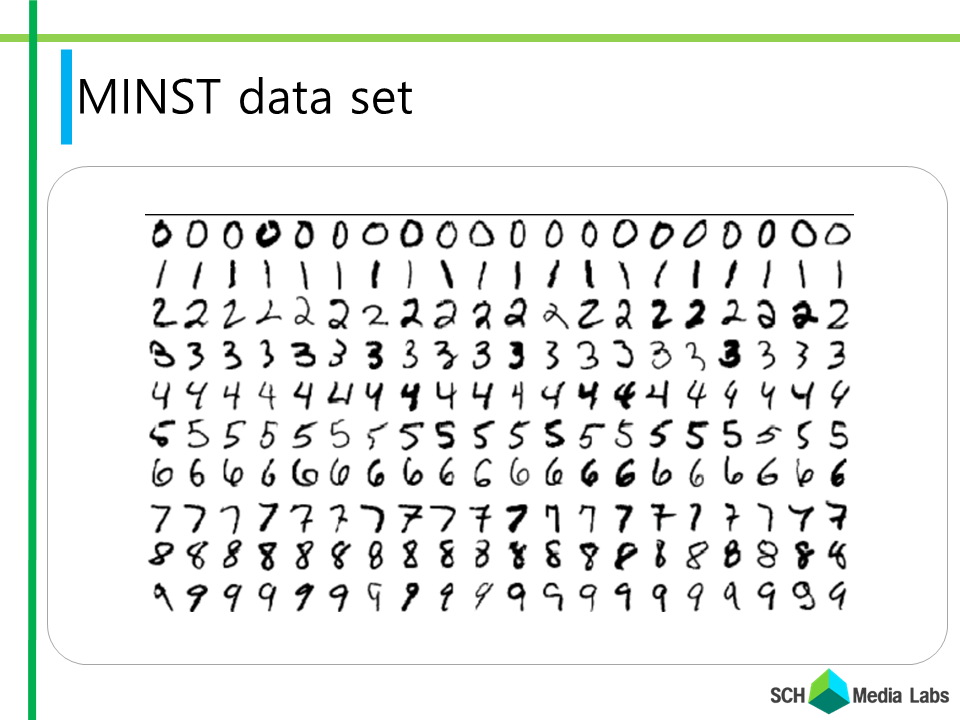

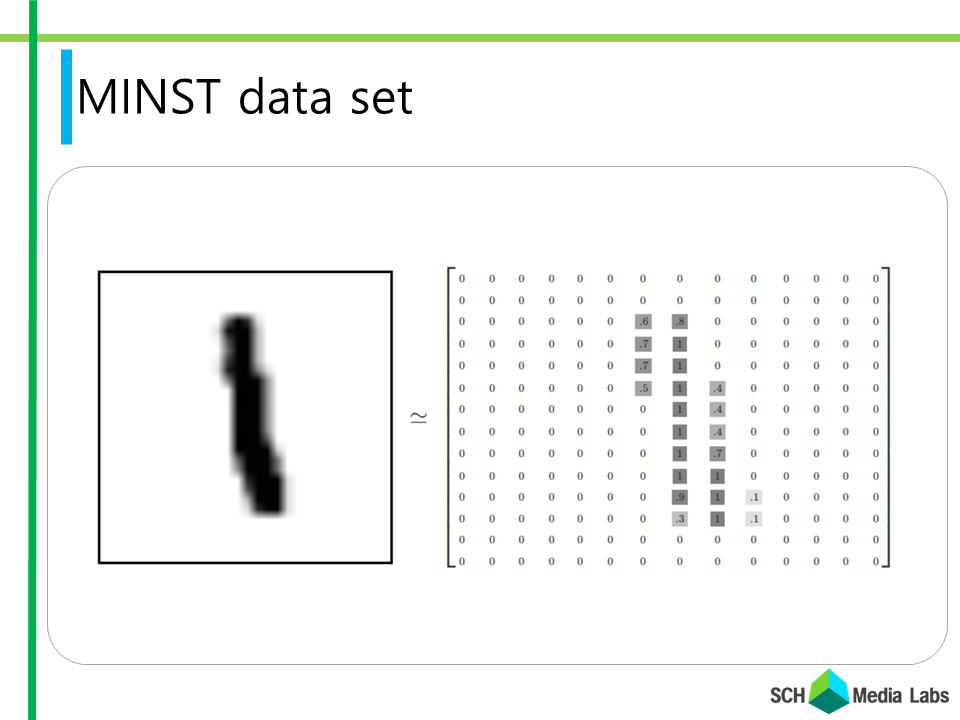

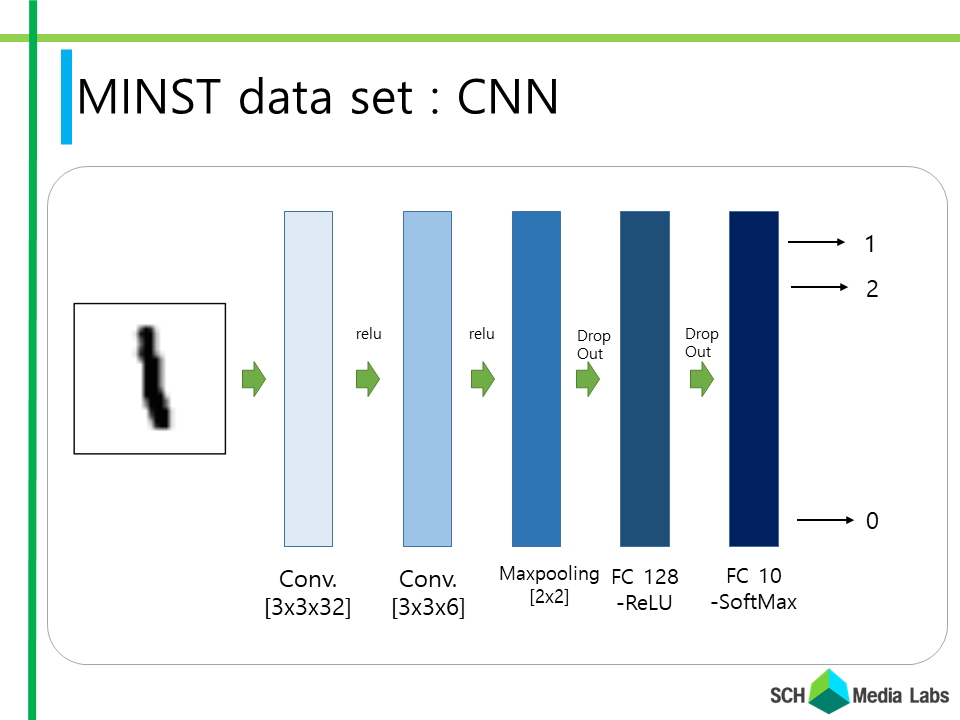

In [ ]:

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 3

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(input_shape)
# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

# build your model

model.compile(loss='categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('my_mnist_model.h5')
del model

# load model

In [ ]:
from tensorflow.keras.models import load_model
# returns a compiled model
model = load_model('my_mnist_model.h5')
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model = load_model('my_mnist_model.h5')

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=9,
          verbose=1,
          validation_split= 0.1)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# add layers

In [ ]:
model = load_model('my_mnist_model.h5')

n = len(model.layers)

top_model = Sequential()
top_model.add(Dense(256, activation='relu',input_shape=model.output_shape))
top_model.add(Dropout(0.5))
top_model.add(Dense(num_classes, activation='sigmoid'))

model.add(top_model)

for layer in model.layers[:n]:
    layer.trainable = False

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=9,
          verbose=1,
          validation_split= 0.1)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Cifar Data Set
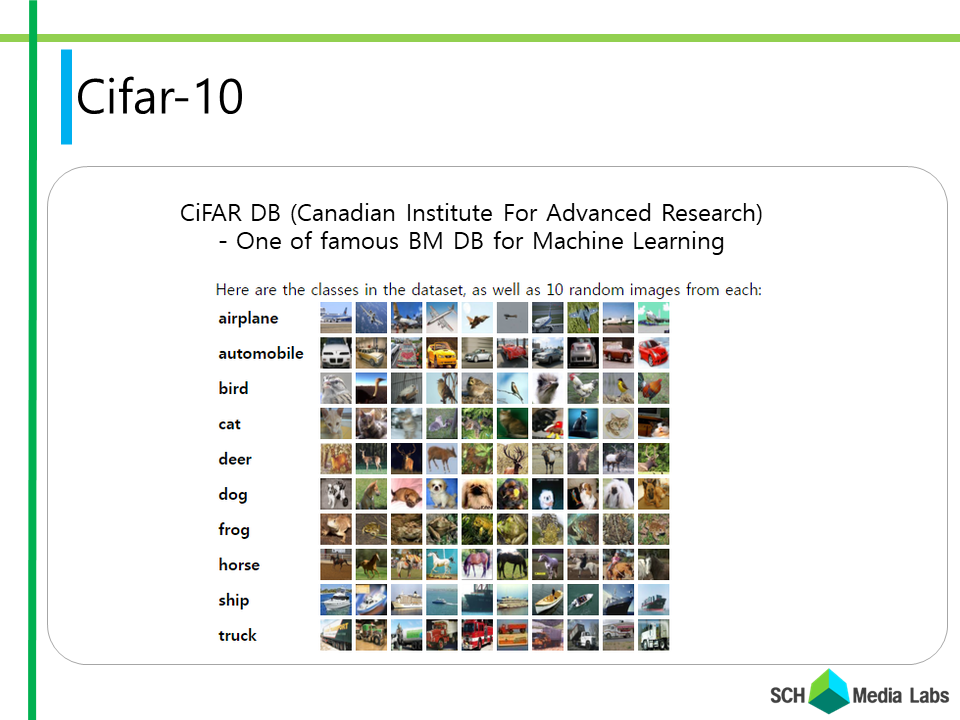

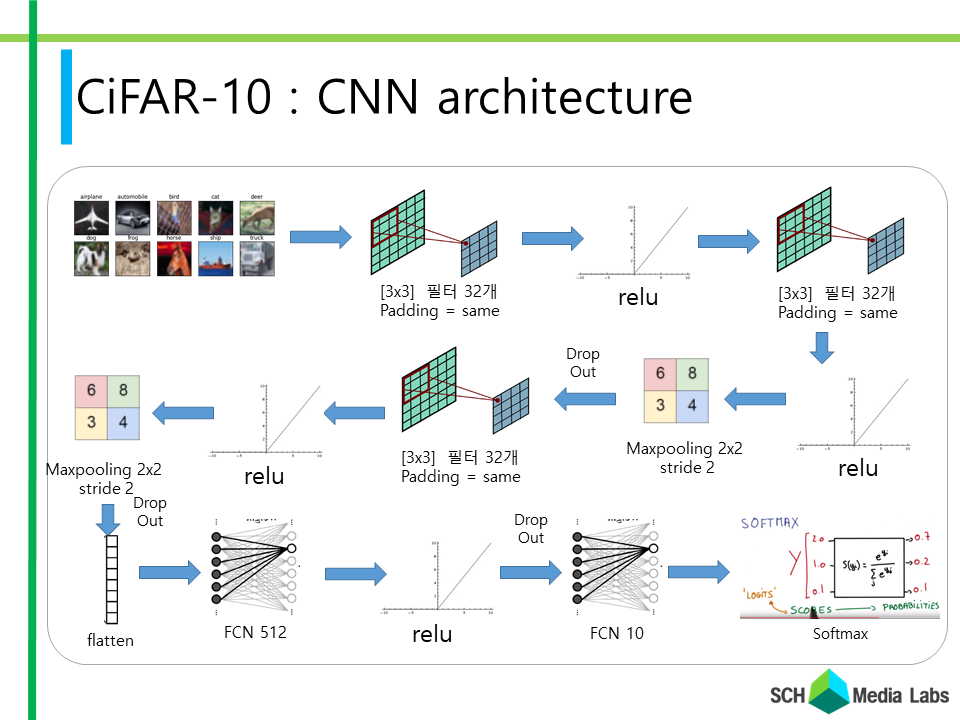

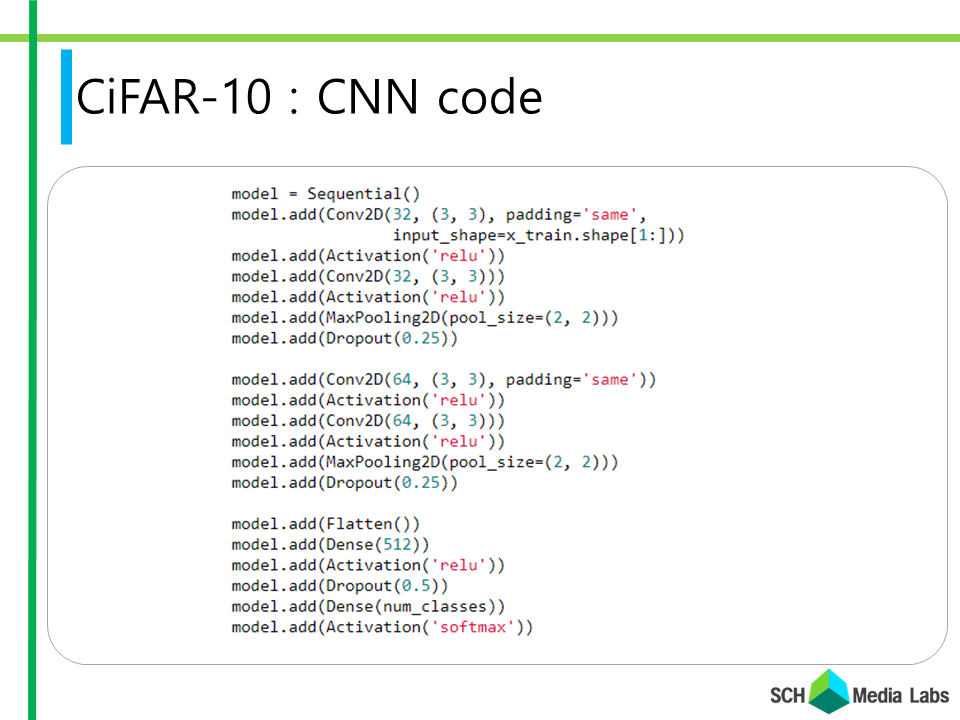

In [ ]:
import tensorflow.keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

batch_size = 32
num_classes = 10
epochs = 100
num_predictions = 20

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### model add


# Let's train the model using categorical loss & adam
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))


# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# load pre-trained model

In [ ]:
from tensorflow.keras.applications import VGG16

image_size = 224
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

vgg_conv.summary()

# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)
    
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet')

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

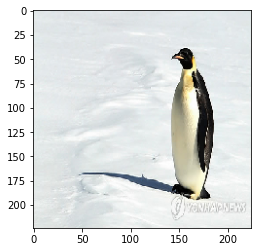

(1, 224, 224, 3)
(1, 1000)
king_penguin (100.00%)


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

# load an image from file
img = load_img('./img/test.jpg', target_size=(224, 224))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

print(img.shape)

img = preprocess_input(img)

yhat = model.predict(img)

print(yhat.shape)

label = decode_predictions(yhat)
label = label[0][0]

# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

In [6]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    

    # Display the resulting frame
    
    dst = cv2.resize(frame, dsize=(224, 224), interpolation=cv2.INTER_AREA)    
    img = img_to_array(dst)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)
    yhat = model.predict(img)

    label = decode_predictions(yhat)
    label = label[0][0]
    
    cv2.imshow('frame',dst)
    
    if cv2.waitKey(1) & 0xFF == ord('w'):
        print('%s (%.2f%%)' % (label[1], label[2]*100))
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

remote_control (12.41%)
ocarina (32.88%)
ocarina (32.71%)
lighter (15.64%)
cleaver (17.51%)
cleaver (14.85%)
cleaver (7.53%)
water_bottle (57.11%)
water_bottle (81.50%)
punching_bag (13.50%)
laptop (40.87%)
laptop (29.32%)
suit (15.24%)


KeyboardInterrupt: 